<a href="https://colab.research.google.com/github/arkwith7/aSSIST_ML/blob/main/%EB%B0%95%ED%98%95%EC%8B%9D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  데이터 분석과제
### 고객1
주말은 가족과 함께 평일앤 홀로 부천시에 직장 다니는 외로운 직장맘		
성별 : 여성, 연령 : 35세, 		
가구형태 : 평일 -> 1인 가구, 주말 3인 가구(남편 자녀 1명), 이용채널 : 대형마트	

### 고객2
마트를 집앞 슈퍼 처럼 이용하는 1인 가구 직장인	
성별 : 여성, 연령 : 27세	
가구 형태 : 1인 가구	, 이용채널 : 대형마트	

### 고객3
코로나 이후 오프라인 이용 목적이 뚜렷한 온라인 이용 주부	
성별 : 여성, 연령 : 36세	
가구형태 : 3인 가구(남편 , 자녀1명)
이용채널 : 대형마트, 모바일

### 고객4
쇼핑을 여러 채널에서 하는 4인가구 주부	
성별 : 여성, 연령 : 46세	
가구형태 : 4인가구(남편, 자녀 2명)
이용 채널 : 슈퍼마켓 , 모바일, 창고형마트

In [ ]:
# Step 1, Matplotlibs 업그레이드
!pip install matplotlib -U
!pip install seaborn -U
!pip install pandas -U

# Step 2, 한글 설치 및 사용 설정
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Step 3, 셀 실행 후 런타임 재시작

In [ ]:
# Step 4, seaborn 환경설정
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('colorblind')
sns.set_context('talk')

# Step 5, 한글 글꼴 설정
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = ['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 한글 설정 확인
%matplotlib inline
plt.title('한글 테스트')
plt.show()     

##2. 분석 코드
 

2-1. data frame 로드

 

필요한 라이브러리를 import 하고, read_csv를 이용해 데이터값을 불러왔다.

In [2]:
import pandas as pd
from scipy.interpolate import make_interp_spline, BSpline

df = pd.read_csv('/content/sample_data/Data Busking.csv', encoding='utf-8')

2-2. 데이터셋 확인

 

In [3]:
print('\n')
print(df.head(3))
print("\n-------------------------------------------------\n")
print(df.info())
print("\n-------------------------------------------------\n")
print(df.describe())



  고객구분      구매일자   점포    채널 요일   카테고리명 PB 상품여부     구매시간대     구매금액  구매수량
0    A  20200509  익산점  대형마트  토   소프트캔디       N  16:23:43   1,690    1.0
1    A  20200509  익산점  대형마트  토  연제품 과세       N  16:23:43   3,490    1.0
2    A  20200509  익산점  대형마트  토    착향우유       N  16:23:43   1,050    1.0

-------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객구분     1066 non-null   object 
 1   구매일자     1066 non-null   int64  
 2   점포       1066 non-null   object 
 3   채널       1066 non-null   object 
 4   요일       1066 non-null   object 
 5   카테고리명    1066 non-null   object 
 6   PB 상품여부  1065 non-null   object 
 7   구매시간대    1066 non-null   object 
 8   구매금액     1066 non-null   object 
 9   구매수량     1065 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 83.4+ KB
None

--------------------------

2-3. EDA (시각화)


2-3-1. 고객별 데이타 분포

 

가장 먼저, 첫 컬럼인 고객구분(고객4명)별  데이터 분포를 파이차트로 살펴보았다.

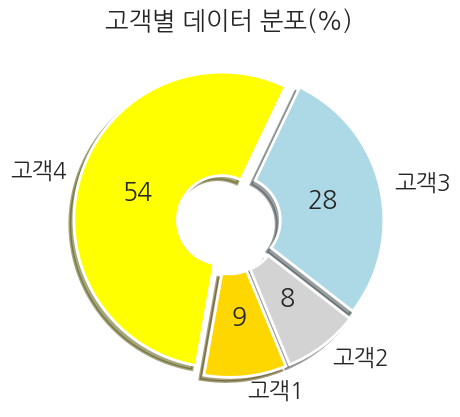

In [4]:
# 고객별 분포

target = df['고객구분']


ratio = [target.value_counts()['A'], target.value_counts()['B'], target.value_counts()['C'], target.value_counts()['D']]
labels = target.unique().tolist()
labels = ['고객1','고객2','고객3','고객4']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['gold', 'lightgray',  'lightblue', 'yellow']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}

plt.pie(ratio, labels=labels, explode=explode, 
        shadow=True, colors=colors, startangle=260, autopct='%.f',
        wedgeprops=wedgeprops);
plt.title("고객별 데이터 분포(%)");

2-3-2. 고객에 따른 요일별 구매 분포

 

 

고객별 데이이타 분포를 살펴봤으니 그 다음은 고객들의 '요일'컬럼을 이용해서 고객별 요일별 구매 특성을 살편본다.




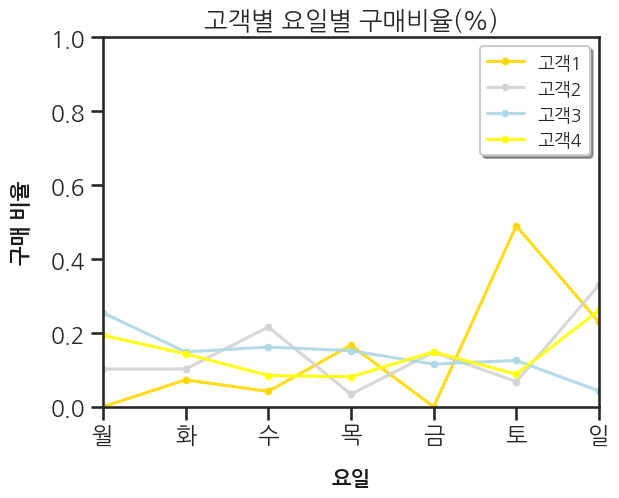

In [20]:
# print(df.groupby([df['고객구분'],df['요일']]).count())
# print('\n----------------------------------\n')

day_map = {'월': 0, '화': 1, '수': 2, '목': 3, '금': 4, '토': 5, '일': 6}
day_list = ['월', '화', '수', '목', '금', '토', '일']
font = {'color': '#191919',
       'size': 15,
       'weight': 'bold'}

def MakeDF(target, label, color):
    target_df = df[df['고객구분'] == target]
    total_count = target_df['요일'].count()
    
    # 모든 요일에 대해 값을 초기화합니다.
    week_data = {i: 0 for i in range(7)}
    
    # 기존 데이터를 업데이트합니다.
    week_data.update(target_df['요일'].map(day_map).value_counts().to_dict())
    
    # 전체 건수로 나누어 백분율을 계산합니다.
    week_data = {k: v/total_count for k, v in week_data.items()}
    
    # 정렬된 인덱스를 기준으로 DataFrame을 생성합니다.
    tg_df = pd.DataFrame.from_dict(week_data, orient='index').sort_index()
    
    x_labels = [day_list[i] for i in tg_df.index]
    y_labels = tg_df[0]  # column name은 0입니다.
    
    plt.plot(x_labels, y_labels, label=label, color=color, alpha=0.9, marker='.')

# 'A', 'B', 'C', 'D'를 '고객1', '고객2', '고객3', '고객4'로 변경하여 호출합니다.
MakeDF('A', '고객1', 'gold')
MakeDF('B', '고객2', 'lightgray')
MakeDF('C', '고객3', 'lightblue')
MakeDF('D', '고객4', 'yellow')

plt.title("고객별 요일별 구매비율(%)");
plt.xlabel('요일', labelpad=15, fontdict=font, loc='center')
plt.ylabel('구매 비율', labelpad=15, fontdict=font)
plt.legend(ncol=1, fontsize=13, shadow=True)
plt.axis(['월', '일', 0, 1]) 

plt.show()



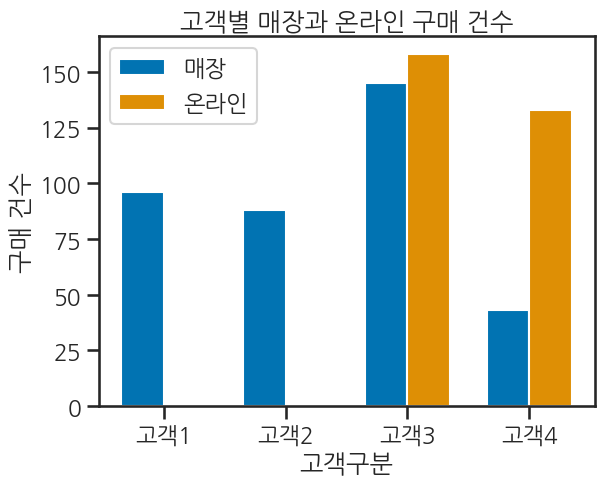

In [12]:
import numpy as np

# 채널에 대한 매핑 정보
channel_map = {'모바일': '온라인', '대형마트': '매장'}

def MakeDF(target):
    target_df = df.loc[df['고객구분'] == target].copy()  # use .copy() to create a separate DataFrame
    target_df['채널'] = target_df['채널'].map(channel_map)
    
    # 모든 채널에 대해 값을 초기화합니다.
    channel_data = {channel: 0 for channel in channel_map.values()}
    
    # 기존 데이터를 업데이트합니다.
    channel_data.update(target_df['채널'].value_counts().to_dict())
    
    return channel_data

# 'A', 'B', 'C', 'D'를 '고객1', '고객2', '고객3', '고객4'로 변경하여 호출합니다.
channel_labels = list(channel_map.values())
customer_labels = ['고객1', '고객2', '고객3', '고객4']
customers = ['A', 'B', 'C', 'D']
data = [MakeDF(customer) for customer in customers]

x = np.arange(len(customer_labels))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [d['매장'] for d in data], width, label='매장')
rects2 = ax.bar(x + width/2, [d['온라인'] for d in data], width, label='온라인')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('구매 건수')
ax.set_xlabel('고객구분')
ax.set_title('고객별 매장과 온라인 구매 건수')
ax.set_xticks(x)
ax.set_xticklabels(customer_labels)
ax.legend()

plt.show()

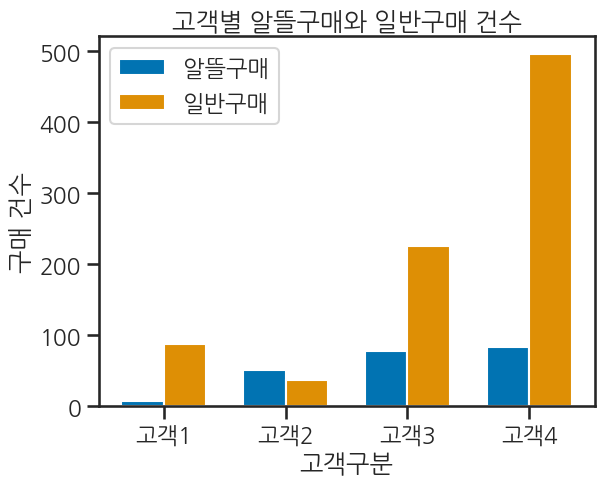

In [13]:
# PB 상품에 대한 매핑 정보
pb_map = {'Y': '알뜰구매', 'N': '일반구매'}

def MakeDF(target):
    target_df = df.loc[df['고객구분'] == target].copy()
    target_df['PB 상품여부'] = target_df['PB 상품여부'].map(pb_map)
    
    # 모든 구매 유형에 대해 값을 초기화합니다.
    purchase_data = {purchase_type: 0 for purchase_type in pb_map.values()}
    
    # 기존 데이터를 업데이트합니다.
    purchase_data.update(target_df['PB 상품여부'].value_counts().to_dict())
    
    return purchase_data

# 'A', 'B', 'C', 'D'를 '고객1', '고객2', '고객3', '고객4'로 변경하여 호출합니다.
purchase_labels = list(pb_map.values())
customer_labels = ['고객1', '고객2', '고객3', '고객4']
customers = ['A', 'B', 'C', 'D']
data = [MakeDF(customer) for customer in customers]

x = np.arange(len(customer_labels))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [d['알뜰구매'] for d in data], width, label='알뜰구매')
rects2 = ax.bar(x + width/2, [d['일반구매'] for d in data], width, label='일반구매')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('구매 건수')
ax.set_xlabel('고객구분')
ax.set_title('고객별 알뜰구매와 일반구매 건수')
ax.set_xticks(x)
ax.set_xticklabels(customer_labels)
ax.legend()

plt.show()


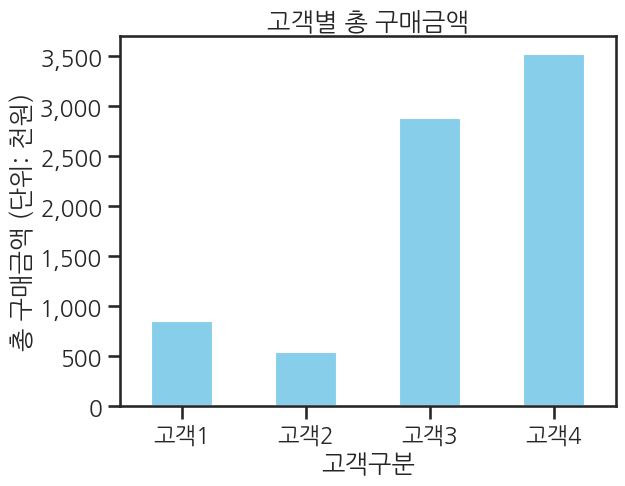

In [18]:
from matplotlib.ticker import FuncFormatter

# 각 고객별로 총 구매금액을 계산하고 1,000으로 나누어 주기
customer_total_purchase = df.groupby('고객구분')['구매금액'].sum() / 1000

# 'A', 'B', 'C', 'D'를 '고객1', '고객2', '고객3', '고객4'로 변경
customer_total_purchase.index = ['고객1', '고객2', '고객3', '고객4']

# 막대그래프로 시각화
ax = customer_total_purchase.plot(kind='bar', color='skyblue')

# Y축 레이블을 천단위 콤마 표기로 변경
formatter = FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)

plt.xlabel('고객구분')
plt.ylabel('총 구매금액 (단위: 천원)')
plt.title('고객별 총 구매금액')
plt.xticks(rotation=0)  # x축 라벨 회전 각도 설정
plt.show()

